# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

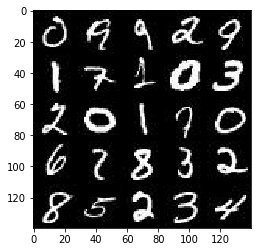

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

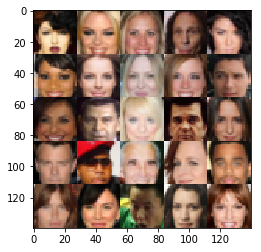

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    return(
        tf.placeholder(dtype=tf.float32, shape=(None, image_width, image_height, image_channels), name="input_images"),
        tf.placeholder(dtype=tf.float32, shape=(None, z_dim), name="z_data"),
        tf.placeholder(dtype=tf.float32, shape=(), name="learning_rate")
    )

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    # From theory videos
    with tf.variable_scope('discriminator', reuse=reuse):  
        alpha=0.1      
        # 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=1, padding="same")
        relu1 = tf.maximum(alpha*x1, x1)
        # 28x28x64
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*x2, x2)
        # 14x14x128
        x3 = tf.layers.conv2d(relu2, 256, 3, strides=2, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha*x3, x3)
        # 7x7x256
        
        # Discriminator should be simplier than the generator
        #x4 = tf.layers.conv2d(relu3, 512, 3, strides=1, padding="valid")
        #x4 = tf.layers.batch_normalization(x4, training=True)
        #relu4 = tf.maximum(alpha*x4, x4)
        # 5x5x512      
        
        # Flatten
        flat = tf.contrib.layers.flatten(relu3)
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope("generator", reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*1024)
        # Convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 1024))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        # 7x7x1024
        x2 = tf.layers.conv2d_transpose(x1, 512, 3, strides=2, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)
        # 14x14x512
        x3 = tf.layers.conv2d_transpose(x2, 256, 3, strides=1, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        # 14x14x256
        x4 = tf.layers.conv2d_transpose(x3, 128, 5, strides=2, padding="same")
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha*x4, x4)
        # 28x28x128        
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=1, padding="same")
        # 28x28x3
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real))
    )
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake))
    )
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake))
    )    
    d_loss = d_loss_real + d_loss_fake
    return(d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    #tf.reset_default_graph() # outputs errors WTF?
    #saver  = tf.train.Saver() 
    _, d_w, d_h, d_c = data_shape
    input_real, input_z, lr_placeholder = model_inputs(d_w, d_h, d_c, z_dim)      
    # Losses    
    d_loss, g_loss = model_loss(input_real, input_z, d_c)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    steps = 0   
    samples = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2  # As requested per reviewer
                steps += 1
                # TODO: Train Model                      
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})        
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                if steps % 100 == 0:
                    show_generator_output(sess, 20, input_z, d_c, data_image_mode)
        #saver.save(sess, './checkpoints/generator.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.0131... Generator Loss: 6.2594
Epoch 1/2... Discriminator Loss: 2.4751... Generator Loss: 0.4666
Epoch 1/2... Discriminator Loss: 0.3574... Generator Loss: 2.4304
Epoch 1/2... Discriminator Loss: 1.2041... Generator Loss: 1.6145
Epoch 1/2... Discriminator Loss: 1.8202... Generator Loss: 1.6289
Epoch 1/2... Discriminator Loss: 2.0499... Generator Loss: 2.2201
Epoch 1/2... Discriminator Loss: 1.7778... Generator Loss: 1.2451
Epoch 1/2... Discriminator Loss: 1.7805... Generator Loss: 1.8744
Epoch 1/2... Discriminator Loss: 1.2310... Generator Loss: 1.5182
Epoch 1/2... Discriminator Loss: 1.5279... Generator Loss: 1.8112


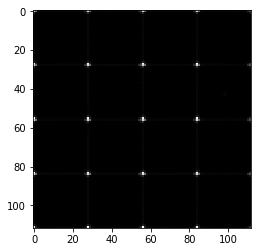

Epoch 1/2... Discriminator Loss: 2.3623... Generator Loss: 0.1552
Epoch 1/2... Discriminator Loss: 1.7831... Generator Loss: 0.2535
Epoch 1/2... Discriminator Loss: 1.5270... Generator Loss: 0.3079
Epoch 1/2... Discriminator Loss: 1.6277... Generator Loss: 0.2846
Epoch 1/2... Discriminator Loss: 1.8334... Generator Loss: 0.2152
Epoch 1/2... Discriminator Loss: 1.0893... Generator Loss: 0.7628
Epoch 1/2... Discriminator Loss: 2.6651... Generator Loss: 4.1486
Epoch 1/2... Discriminator Loss: 1.9975... Generator Loss: 2.6719
Epoch 1/2... Discriminator Loss: 1.4437... Generator Loss: 0.3309
Epoch 1/2... Discriminator Loss: 1.0734... Generator Loss: 1.8416


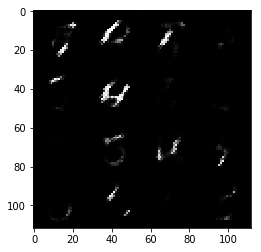

Epoch 1/2... Discriminator Loss: 0.7525... Generator Loss: 1.0214
Epoch 1/2... Discriminator Loss: 1.0613... Generator Loss: 0.5917
Epoch 1/2... Discriminator Loss: 0.9203... Generator Loss: 0.9068
Epoch 1/2... Discriminator Loss: 1.3634... Generator Loss: 0.5063
Epoch 1/2... Discriminator Loss: 0.8112... Generator Loss: 1.3462
Epoch 1/2... Discriminator Loss: 1.7392... Generator Loss: 0.2572
Epoch 1/2... Discriminator Loss: 1.1632... Generator Loss: 0.5892
Epoch 1/2... Discriminator Loss: 1.2020... Generator Loss: 0.5238
Epoch 1/2... Discriminator Loss: 1.7150... Generator Loss: 1.7937
Epoch 1/2... Discriminator Loss: 1.4690... Generator Loss: 0.3949


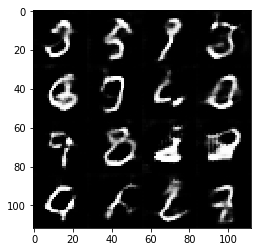

Epoch 1/2... Discriminator Loss: 1.4286... Generator Loss: 0.3751
Epoch 1/2... Discriminator Loss: 1.3115... Generator Loss: 0.4192
Epoch 1/2... Discriminator Loss: 1.4001... Generator Loss: 1.0848
Epoch 1/2... Discriminator Loss: 1.0775... Generator Loss: 1.0919
Epoch 1/2... Discriminator Loss: 1.1560... Generator Loss: 1.7672
Epoch 1/2... Discriminator Loss: 1.6117... Generator Loss: 1.8826
Epoch 1/2... Discriminator Loss: 1.3124... Generator Loss: 0.8578
Epoch 1/2... Discriminator Loss: 1.3210... Generator Loss: 0.5391
Epoch 1/2... Discriminator Loss: 1.3080... Generator Loss: 0.9493
Epoch 1/2... Discriminator Loss: 1.2165... Generator Loss: 1.1365


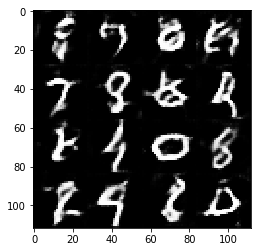

Epoch 1/2... Discriminator Loss: 1.4573... Generator Loss: 0.3765
Epoch 1/2... Discriminator Loss: 1.5011... Generator Loss: 0.9765
Epoch 1/2... Discriminator Loss: 1.5559... Generator Loss: 1.6567
Epoch 1/2... Discriminator Loss: 1.1969... Generator Loss: 1.0124
Epoch 1/2... Discriminator Loss: 1.1523... Generator Loss: 0.7320
Epoch 1/2... Discriminator Loss: 1.4777... Generator Loss: 0.4627
Epoch 1/2... Discriminator Loss: 1.5524... Generator Loss: 0.4496
Epoch 1/2... Discriminator Loss: 1.2688... Generator Loss: 0.8242
Epoch 1/2... Discriminator Loss: 1.6377... Generator Loss: 1.3307
Epoch 1/2... Discriminator Loss: 1.3871... Generator Loss: 0.4444


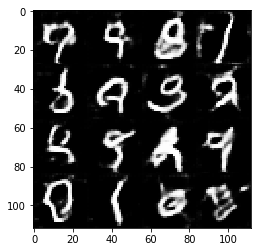

Epoch 1/2... Discriminator Loss: 1.2498... Generator Loss: 0.6464
Epoch 1/2... Discriminator Loss: 1.2745... Generator Loss: 0.8508
Epoch 1/2... Discriminator Loss: 1.3662... Generator Loss: 0.9796
Epoch 1/2... Discriminator Loss: 1.6099... Generator Loss: 1.4987
Epoch 1/2... Discriminator Loss: 1.4902... Generator Loss: 1.2813
Epoch 1/2... Discriminator Loss: 1.2886... Generator Loss: 1.1291
Epoch 1/2... Discriminator Loss: 1.3662... Generator Loss: 1.4701
Epoch 1/2... Discriminator Loss: 1.3008... Generator Loss: 0.8080
Epoch 1/2... Discriminator Loss: 1.3950... Generator Loss: 0.9599
Epoch 1/2... Discriminator Loss: 1.2291... Generator Loss: 1.0408


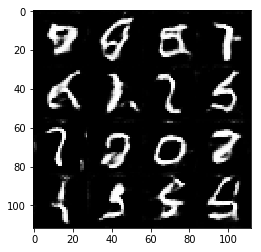

Epoch 1/2... Discriminator Loss: 1.2498... Generator Loss: 1.3195
Epoch 1/2... Discriminator Loss: 1.3036... Generator Loss: 0.6050
Epoch 1/2... Discriminator Loss: 1.2618... Generator Loss: 0.5455
Epoch 1/2... Discriminator Loss: 1.3094... Generator Loss: 0.4467
Epoch 1/2... Discriminator Loss: 1.6281... Generator Loss: 0.3189
Epoch 1/2... Discriminator Loss: 1.5812... Generator Loss: 0.3232
Epoch 1/2... Discriminator Loss: 1.4974... Generator Loss: 0.3394
Epoch 1/2... Discriminator Loss: 1.5029... Generator Loss: 1.0023
Epoch 1/2... Discriminator Loss: 1.3501... Generator Loss: 0.5403
Epoch 1/2... Discriminator Loss: 1.3506... Generator Loss: 0.5341


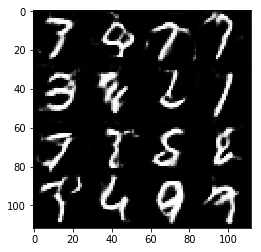

Epoch 1/2... Discriminator Loss: 1.8096... Generator Loss: 0.2375
Epoch 1/2... Discriminator Loss: 1.5579... Generator Loss: 0.3291
Epoch 1/2... Discriminator Loss: 1.3026... Generator Loss: 0.5687
Epoch 1/2... Discriminator Loss: 1.5651... Generator Loss: 0.3853
Epoch 1/2... Discriminator Loss: 1.4261... Generator Loss: 0.3860
Epoch 1/2... Discriminator Loss: 1.4597... Generator Loss: 0.4371
Epoch 1/2... Discriminator Loss: 1.5506... Generator Loss: 1.9301
Epoch 1/2... Discriminator Loss: 0.9450... Generator Loss: 1.0688
Epoch 1/2... Discriminator Loss: 1.5681... Generator Loss: 1.7328
Epoch 1/2... Discriminator Loss: 1.2317... Generator Loss: 0.7563


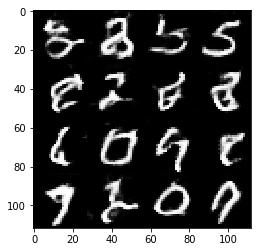

Epoch 1/2... Discriminator Loss: 1.3244... Generator Loss: 1.1644
Epoch 1/2... Discriminator Loss: 1.3368... Generator Loss: 1.4835
Epoch 1/2... Discriminator Loss: 1.2403... Generator Loss: 1.2536
Epoch 1/2... Discriminator Loss: 1.4169... Generator Loss: 0.9926
Epoch 1/2... Discriminator Loss: 1.3562... Generator Loss: 0.5719
Epoch 1/2... Discriminator Loss: 1.1574... Generator Loss: 0.6385
Epoch 1/2... Discriminator Loss: 1.4156... Generator Loss: 0.4615
Epoch 1/2... Discriminator Loss: 1.4072... Generator Loss: 0.3908
Epoch 1/2... Discriminator Loss: 1.9003... Generator Loss: 0.2230
Epoch 1/2... Discriminator Loss: 1.7030... Generator Loss: 0.2759


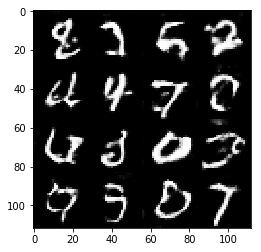

Epoch 1/2... Discriminator Loss: 1.5300... Generator Loss: 0.3468
Epoch 1/2... Discriminator Loss: 1.7997... Generator Loss: 0.2669
Epoch 1/2... Discriminator Loss: 1.2299... Generator Loss: 1.0299
Epoch 2/2... Discriminator Loss: 1.1365... Generator Loss: 0.9487
Epoch 2/2... Discriminator Loss: 1.2070... Generator Loss: 0.7804
Epoch 2/2... Discriminator Loss: 1.9243... Generator Loss: 0.2123
Epoch 2/2... Discriminator Loss: 1.0815... Generator Loss: 0.8809
Epoch 2/2... Discriminator Loss: 1.0502... Generator Loss: 0.9494
Epoch 2/2... Discriminator Loss: 1.1441... Generator Loss: 1.5805
Epoch 2/2... Discriminator Loss: 1.6020... Generator Loss: 0.3140


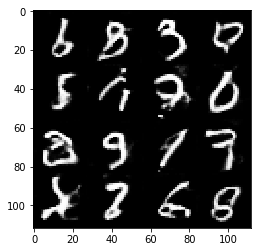

Epoch 2/2... Discriminator Loss: 1.0566... Generator Loss: 0.9151
Epoch 2/2... Discriminator Loss: 1.6707... Generator Loss: 1.9635
Epoch 2/2... Discriminator Loss: 1.1902... Generator Loss: 0.9570
Epoch 2/2... Discriminator Loss: 1.3557... Generator Loss: 0.5997
Epoch 2/2... Discriminator Loss: 1.1407... Generator Loss: 0.8577
Epoch 2/2... Discriminator Loss: 1.3896... Generator Loss: 0.9679
Epoch 2/2... Discriminator Loss: 1.1664... Generator Loss: 1.3943
Epoch 2/2... Discriminator Loss: 1.1287... Generator Loss: 1.2914
Epoch 2/2... Discriminator Loss: 0.9867... Generator Loss: 1.1263
Epoch 2/2... Discriminator Loss: 1.2344... Generator Loss: 0.9649


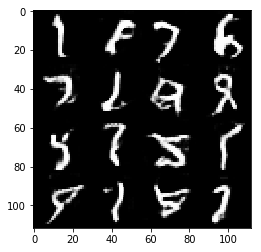

Epoch 2/2... Discriminator Loss: 1.2861... Generator Loss: 0.7825
Epoch 2/2... Discriminator Loss: 1.4861... Generator Loss: 0.3436
Epoch 2/2... Discriminator Loss: 1.6389... Generator Loss: 0.2977
Epoch 2/2... Discriminator Loss: 1.3532... Generator Loss: 0.6451
Epoch 2/2... Discriminator Loss: 1.1513... Generator Loss: 0.7387
Epoch 2/2... Discriminator Loss: 1.5036... Generator Loss: 0.3447
Epoch 2/2... Discriminator Loss: 1.1027... Generator Loss: 0.7599
Epoch 2/2... Discriminator Loss: 1.2392... Generator Loss: 0.7327
Epoch 2/2... Discriminator Loss: 1.4429... Generator Loss: 1.9894
Epoch 2/2... Discriminator Loss: 1.0475... Generator Loss: 1.6856


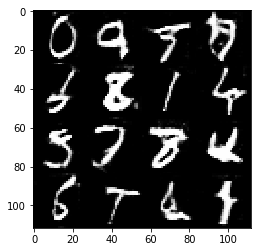

Epoch 2/2... Discriminator Loss: 1.8451... Generator Loss: 2.0829
Epoch 2/2... Discriminator Loss: 1.1491... Generator Loss: 0.6743
Epoch 2/2... Discriminator Loss: 1.5959... Generator Loss: 0.3485
Epoch 2/2... Discriminator Loss: 1.3004... Generator Loss: 0.4703
Epoch 2/2... Discriminator Loss: 0.8215... Generator Loss: 1.0168
Epoch 2/2... Discriminator Loss: 1.3623... Generator Loss: 0.5170
Epoch 2/2... Discriminator Loss: 1.3525... Generator Loss: 0.9602
Epoch 2/2... Discriminator Loss: 1.3445... Generator Loss: 0.4341
Epoch 2/2... Discriminator Loss: 1.1882... Generator Loss: 0.5382
Epoch 2/2... Discriminator Loss: 1.0778... Generator Loss: 0.9885


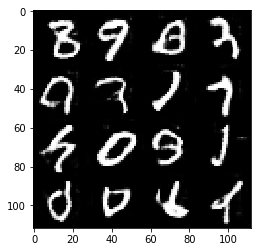

Epoch 2/2... Discriminator Loss: 1.0632... Generator Loss: 0.6651
Epoch 2/2... Discriminator Loss: 1.8588... Generator Loss: 0.2841
Epoch 2/2... Discriminator Loss: 1.3816... Generator Loss: 0.4050
Epoch 2/2... Discriminator Loss: 1.0004... Generator Loss: 0.8375
Epoch 2/2... Discriminator Loss: 1.1280... Generator Loss: 1.0656
Epoch 2/2... Discriminator Loss: 1.1209... Generator Loss: 0.8725
Epoch 2/2... Discriminator Loss: 1.1206... Generator Loss: 0.8440
Epoch 2/2... Discriminator Loss: 1.3843... Generator Loss: 1.5010
Epoch 2/2... Discriminator Loss: 1.0269... Generator Loss: 1.0596
Epoch 2/2... Discriminator Loss: 1.1568... Generator Loss: 1.4302


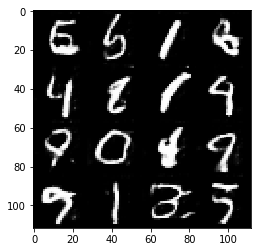

Epoch 2/2... Discriminator Loss: 1.0991... Generator Loss: 2.2097
Epoch 2/2... Discriminator Loss: 1.1096... Generator Loss: 0.9851
Epoch 2/2... Discriminator Loss: 3.2412... Generator Loss: 0.0501
Epoch 2/2... Discriminator Loss: 1.2233... Generator Loss: 0.5730
Epoch 2/2... Discriminator Loss: 0.7986... Generator Loss: 1.0422
Epoch 2/2... Discriminator Loss: 2.5766... Generator Loss: 2.9344
Epoch 2/2... Discriminator Loss: 0.9741... Generator Loss: 0.7251
Epoch 2/2... Discriminator Loss: 1.7166... Generator Loss: 0.2980
Epoch 2/2... Discriminator Loss: 1.4672... Generator Loss: 2.3208
Epoch 2/2... Discriminator Loss: 1.0627... Generator Loss: 0.8309


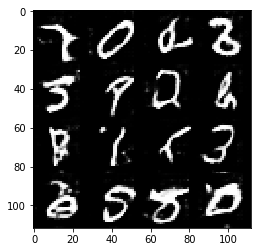

Epoch 2/2... Discriminator Loss: 1.2680... Generator Loss: 1.5025
Epoch 2/2... Discriminator Loss: 1.2974... Generator Loss: 0.5852
Epoch 2/2... Discriminator Loss: 1.6779... Generator Loss: 0.2737
Epoch 2/2... Discriminator Loss: 1.0665... Generator Loss: 0.8472
Epoch 2/2... Discriminator Loss: 1.8017... Generator Loss: 0.2479
Epoch 2/2... Discriminator Loss: 1.9988... Generator Loss: 0.2063
Epoch 2/2... Discriminator Loss: 0.6701... Generator Loss: 1.4623
Epoch 2/2... Discriminator Loss: 1.4527... Generator Loss: 2.5547
Epoch 2/2... Discriminator Loss: 1.3485... Generator Loss: 1.5816
Epoch 2/2... Discriminator Loss: 0.7842... Generator Loss: 1.0435


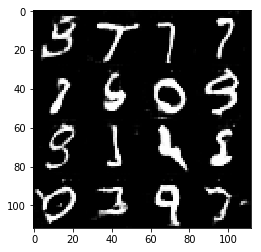

Epoch 2/2... Discriminator Loss: 1.8468... Generator Loss: 0.2387
Epoch 2/2... Discriminator Loss: 1.5896... Generator Loss: 0.3412
Epoch 2/2... Discriminator Loss: 1.0300... Generator Loss: 1.1537
Epoch 2/2... Discriminator Loss: 0.9597... Generator Loss: 1.9954
Epoch 2/2... Discriminator Loss: 0.9412... Generator Loss: 1.2543
Epoch 2/2... Discriminator Loss: 0.9254... Generator Loss: 1.1042
Epoch 2/2... Discriminator Loss: 1.0686... Generator Loss: 2.1033
Epoch 2/2... Discriminator Loss: 0.5701... Generator Loss: 1.3306
Epoch 2/2... Discriminator Loss: 2.4495... Generator Loss: 0.1497
Epoch 2/2... Discriminator Loss: 1.1433... Generator Loss: 0.7162


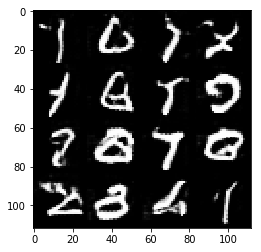

Epoch 2/2... Discriminator Loss: 1.1084... Generator Loss: 0.6219
Epoch 2/2... Discriminator Loss: 1.8321... Generator Loss: 2.3887
Epoch 2/2... Discriminator Loss: 1.3966... Generator Loss: 0.4824
Epoch 2/2... Discriminator Loss: 1.8974... Generator Loss: 2.1743
Epoch 2/2... Discriminator Loss: 0.8600... Generator Loss: 1.0030
Epoch 2/2... Discriminator Loss: 1.1952... Generator Loss: 0.5892
Epoch 2/2... Discriminator Loss: 0.6502... Generator Loss: 1.2241
Epoch 2/2... Discriminator Loss: 0.9181... Generator Loss: 1.0248
Epoch 2/2... Discriminator Loss: 1.3159... Generator Loss: 0.4830
Epoch 2/2... Discriminator Loss: 1.1997... Generator Loss: 0.7422


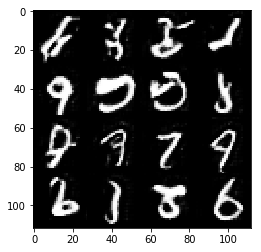

Epoch 2/2... Discriminator Loss: 1.0333... Generator Loss: 0.7185
Epoch 2/2... Discriminator Loss: 1.0297... Generator Loss: 0.6828
Epoch 2/2... Discriminator Loss: 1.2694... Generator Loss: 0.8127
Epoch 2/2... Discriminator Loss: 1.1058... Generator Loss: 0.6498
Epoch 2/2... Discriminator Loss: 2.0064... Generator Loss: 3.1446
Epoch 2/2... Discriminator Loss: 1.1309... Generator Loss: 0.6473
Epoch 2/2... Discriminator Loss: 0.8667... Generator Loss: 0.8601


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0008
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.6238... Generator Loss: 1.4107
Epoch 1/1... Discriminator Loss: 0.7002... Generator Loss: 1.0353
Epoch 1/1... Discriminator Loss: 1.3161... Generator Loss: 0.5241
Epoch 1/1... Discriminator Loss: 1.2320... Generator Loss: 0.6286
Epoch 1/1... Discriminator Loss: 2.6424... Generator Loss: 0.0951
Epoch 1/1... Discriminator Loss: 0.8300... Generator Loss: 0.8196
Epoch 1/1... Discriminator Loss: 3.2810... Generator Loss: 0.0652
Epoch 1/1... Discriminator Loss: 1.1378... Generator Loss: 0.6354
Epoch 1/1... Discriminator Loss: 0.9167... Generator Loss: 0.7885
Epoch 1/1... Discriminator Loss: 2.8545... Generator Loss: 0.0814


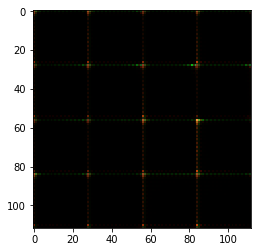

Epoch 1/1... Discriminator Loss: 2.7421... Generator Loss: 0.0953
Epoch 1/1... Discriminator Loss: 2.1838... Generator Loss: 0.2346
Epoch 1/1... Discriminator Loss: 2.2749... Generator Loss: 0.1496
Epoch 1/1... Discriminator Loss: 2.3058... Generator Loss: 0.1875
Epoch 1/1... Discriminator Loss: 2.2750... Generator Loss: 0.1428
Epoch 1/1... Discriminator Loss: 2.5753... Generator Loss: 0.1074
Epoch 1/1... Discriminator Loss: 2.3403... Generator Loss: 0.1496
Epoch 1/1... Discriminator Loss: 1.9009... Generator Loss: 0.2631
Epoch 1/1... Discriminator Loss: 1.8693... Generator Loss: 0.2274
Epoch 1/1... Discriminator Loss: 2.0039... Generator Loss: 0.1905


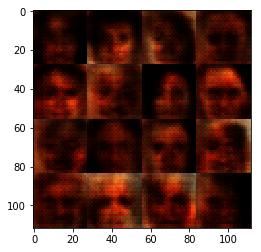

Epoch 1/1... Discriminator Loss: 1.5132... Generator Loss: 0.3328
Epoch 1/1... Discriminator Loss: 1.8114... Generator Loss: 0.2331
Epoch 1/1... Discriminator Loss: 0.5249... Generator Loss: 2.5694
Epoch 1/1... Discriminator Loss: 0.9145... Generator Loss: 0.8022
Epoch 1/1... Discriminator Loss: 1.2827... Generator Loss: 0.4190
Epoch 1/1... Discriminator Loss: 1.4138... Generator Loss: 0.4029
Epoch 1/1... Discriminator Loss: 0.7005... Generator Loss: 0.9475
Epoch 1/1... Discriminator Loss: 1.4249... Generator Loss: 0.4492
Epoch 1/1... Discriminator Loss: 1.8508... Generator Loss: 0.2257
Epoch 1/1... Discriminator Loss: 0.3652... Generator Loss: 2.2615


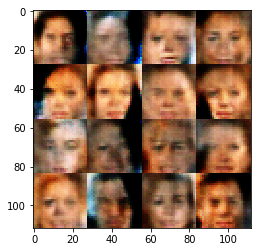

Epoch 1/1... Discriminator Loss: 0.5057... Generator Loss: 1.7733
Epoch 1/1... Discriminator Loss: 0.2543... Generator Loss: 2.2197
Epoch 1/1... Discriminator Loss: 0.5846... Generator Loss: 3.7030
Epoch 1/1... Discriminator Loss: 0.7506... Generator Loss: 1.0536
Epoch 1/1... Discriminator Loss: 2.3567... Generator Loss: 4.6628
Epoch 1/1... Discriminator Loss: 0.7204... Generator Loss: 2.0421
Epoch 1/1... Discriminator Loss: 0.4900... Generator Loss: 1.7177
Epoch 1/1... Discriminator Loss: 0.5560... Generator Loss: 1.4294
Epoch 1/1... Discriminator Loss: 1.0847... Generator Loss: 0.5322
Epoch 1/1... Discriminator Loss: 1.0591... Generator Loss: 0.6804


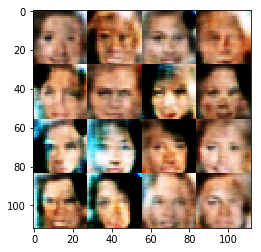

Epoch 1/1... Discriminator Loss: 1.0642... Generator Loss: 0.5885
Epoch 1/1... Discriminator Loss: 0.3572... Generator Loss: 2.7733
Epoch 1/1... Discriminator Loss: 1.2143... Generator Loss: 2.9000
Epoch 1/1... Discriminator Loss: 0.5411... Generator Loss: 1.4161
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.3610
Epoch 1/1... Discriminator Loss: 1.5660... Generator Loss: 0.3177
Epoch 1/1... Discriminator Loss: 0.6847... Generator Loss: 1.7637
Epoch 1/1... Discriminator Loss: 0.5570... Generator Loss: 1.7287
Epoch 1/1... Discriminator Loss: 0.5019... Generator Loss: 3.2029
Epoch 1/1... Discriminator Loss: 1.5047... Generator Loss: 3.2939


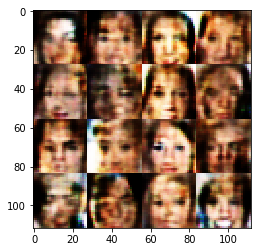

Epoch 1/1... Discriminator Loss: 1.0951... Generator Loss: 1.3497
Epoch 1/1... Discriminator Loss: 0.9984... Generator Loss: 0.6567
Epoch 1/1... Discriminator Loss: 0.3597... Generator Loss: 3.3156
Epoch 1/1... Discriminator Loss: 0.5132... Generator Loss: 1.9797
Epoch 1/1... Discriminator Loss: 0.5278... Generator Loss: 1.2272
Epoch 1/1... Discriminator Loss: 0.3434... Generator Loss: 1.9853
Epoch 1/1... Discriminator Loss: 0.2024... Generator Loss: 2.1576
Epoch 1/1... Discriminator Loss: 1.2585... Generator Loss: 0.5528
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.4194
Epoch 1/1... Discriminator Loss: 0.7600... Generator Loss: 1.5088


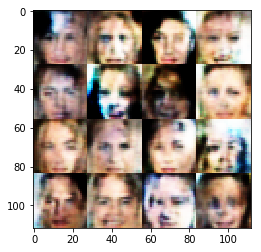

Epoch 1/1... Discriminator Loss: 1.0796... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 0.5404... Generator Loss: 1.1955
Epoch 1/1... Discriminator Loss: 0.8665... Generator Loss: 0.8101
Epoch 1/1... Discriminator Loss: 0.4480... Generator Loss: 2.5636
Epoch 1/1... Discriminator Loss: 0.4973... Generator Loss: 1.1621
Epoch 1/1... Discriminator Loss: 1.6815... Generator Loss: 1.2051
Epoch 1/1... Discriminator Loss: 1.0999... Generator Loss: 2.2310
Epoch 1/1... Discriminator Loss: 0.8082... Generator Loss: 2.0170
Epoch 1/1... Discriminator Loss: 0.5727... Generator Loss: 1.7759
Epoch 1/1... Discriminator Loss: 1.0811... Generator Loss: 1.4093


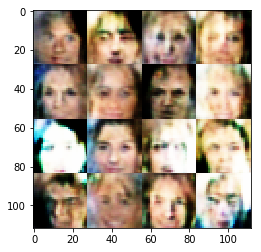

Epoch 1/1... Discriminator Loss: 0.5131... Generator Loss: 2.2384
Epoch 1/1... Discriminator Loss: 0.5295... Generator Loss: 2.2126
Epoch 1/1... Discriminator Loss: 0.4375... Generator Loss: 1.7139
Epoch 1/1... Discriminator Loss: 0.1896... Generator Loss: 2.8514
Epoch 1/1... Discriminator Loss: 1.3871... Generator Loss: 0.3960
Epoch 1/1... Discriminator Loss: 1.1590... Generator Loss: 0.5463
Epoch 1/1... Discriminator Loss: 0.9038... Generator Loss: 2.3278
Epoch 1/1... Discriminator Loss: 0.6022... Generator Loss: 1.3865
Epoch 1/1... Discriminator Loss: 0.4572... Generator Loss: 1.5064
Epoch 1/1... Discriminator Loss: 0.6097... Generator Loss: 3.0645


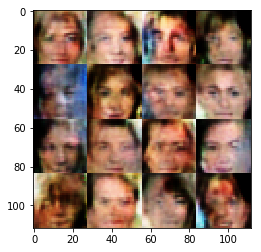

Epoch 1/1... Discriminator Loss: 0.2106... Generator Loss: 3.8297
Epoch 1/1... Discriminator Loss: 0.1287... Generator Loss: 5.7741
Epoch 1/1... Discriminator Loss: 0.2089... Generator Loss: 2.9460
Epoch 1/1... Discriminator Loss: 0.4310... Generator Loss: 2.8136
Epoch 1/1... Discriminator Loss: 1.7023... Generator Loss: 1.9119
Epoch 1/1... Discriminator Loss: 0.5816... Generator Loss: 1.4475
Epoch 1/1... Discriminator Loss: 1.7771... Generator Loss: 0.2470
Epoch 1/1... Discriminator Loss: 0.8580... Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 1.4721... Generator Loss: 0.3859
Epoch 1/1... Discriminator Loss: 1.0720... Generator Loss: 2.2274


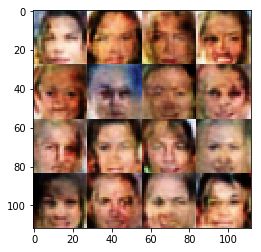

Epoch 1/1... Discriminator Loss: 0.8144... Generator Loss: 2.5342
Epoch 1/1... Discriminator Loss: 0.8522... Generator Loss: 0.7731
Epoch 1/1... Discriminator Loss: 0.2175... Generator Loss: 2.8259
Epoch 1/1... Discriminator Loss: 0.3665... Generator Loss: 2.1620
Epoch 1/1... Discriminator Loss: 0.3401... Generator Loss: 3.2216
Epoch 1/1... Discriminator Loss: 0.2449... Generator Loss: 2.8600
Epoch 1/1... Discriminator Loss: 0.5901... Generator Loss: 1.1758
Epoch 1/1... Discriminator Loss: 1.2174... Generator Loss: 0.4887
Epoch 1/1... Discriminator Loss: 0.7695... Generator Loss: 1.1761
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 3.1205


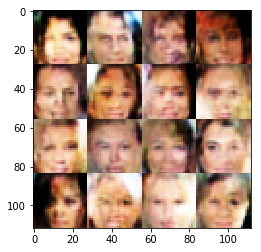

Epoch 1/1... Discriminator Loss: 0.5826... Generator Loss: 1.9218
Epoch 1/1... Discriminator Loss: 2.1401... Generator Loss: 0.1688
Epoch 1/1... Discriminator Loss: 0.6179... Generator Loss: 2.4283
Epoch 1/1... Discriminator Loss: 0.6574... Generator Loss: 1.0419
Epoch 1/1... Discriminator Loss: 1.5862... Generator Loss: 2.3662
Epoch 1/1... Discriminator Loss: 1.0417... Generator Loss: 3.1644
Epoch 1/1... Discriminator Loss: 0.9375... Generator Loss: 1.3246
Epoch 1/1... Discriminator Loss: 0.6118... Generator Loss: 1.3803
Epoch 1/1... Discriminator Loss: 0.4068... Generator Loss: 1.9904
Epoch 1/1... Discriminator Loss: 0.9936... Generator Loss: 2.5325


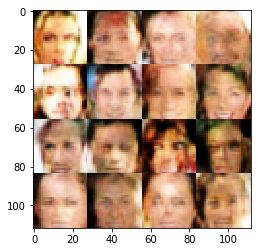

Epoch 1/1... Discriminator Loss: 0.4325... Generator Loss: 1.7640
Epoch 1/1... Discriminator Loss: 0.4752... Generator Loss: 1.3668
Epoch 1/1... Discriminator Loss: 0.1589... Generator Loss: 3.0834
Epoch 1/1... Discriminator Loss: 0.9934... Generator Loss: 0.6500
Epoch 1/1... Discriminator Loss: 0.3343... Generator Loss: 2.1544
Epoch 1/1... Discriminator Loss: 0.4000... Generator Loss: 2.9122
Epoch 1/1... Discriminator Loss: 0.3345... Generator Loss: 3.8321
Epoch 1/1... Discriminator Loss: 0.0705... Generator Loss: 3.4240
Epoch 1/1... Discriminator Loss: 0.6634... Generator Loss: 0.9482
Epoch 1/1... Discriminator Loss: 0.2789... Generator Loss: 1.8983


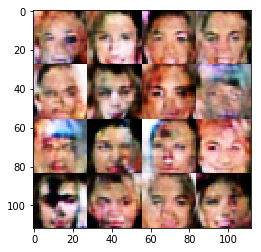

Epoch 1/1... Discriminator Loss: 0.2030... Generator Loss: 4.6149
Epoch 1/1... Discriminator Loss: 0.1626... Generator Loss: 3.2734
Epoch 1/1... Discriminator Loss: 0.2239... Generator Loss: 2.5847
Epoch 1/1... Discriminator Loss: 0.0770... Generator Loss: 4.3464
Epoch 1/1... Discriminator Loss: 1.0527... Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 1.8661... Generator Loss: 0.3453
Epoch 1/1... Discriminator Loss: 1.3978... Generator Loss: 0.5618
Epoch 1/1... Discriminator Loss: 1.0934... Generator Loss: 1.9867
Epoch 1/1... Discriminator Loss: 1.9727... Generator Loss: 0.1899
Epoch 1/1... Discriminator Loss: 1.8571... Generator Loss: 0.2173


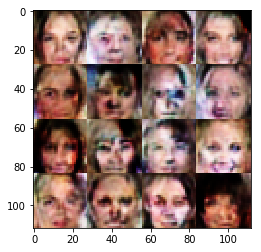

Epoch 1/1... Discriminator Loss: 0.8835... Generator Loss: 1.2200
Epoch 1/1... Discriminator Loss: 1.1492... Generator Loss: 2.0653
Epoch 1/1... Discriminator Loss: 0.8770... Generator Loss: 1.0081
Epoch 1/1... Discriminator Loss: 1.4975... Generator Loss: 2.1821
Epoch 1/1... Discriminator Loss: 1.0343... Generator Loss: 1.8410
Epoch 1/1... Discriminator Loss: 1.3781... Generator Loss: 2.6005
Epoch 1/1... Discriminator Loss: 0.6620... Generator Loss: 1.1138
Epoch 1/1... Discriminator Loss: 1.0872... Generator Loss: 1.6260
Epoch 1/1... Discriminator Loss: 1.4060... Generator Loss: 0.4001
Epoch 1/1... Discriminator Loss: 0.9028... Generator Loss: 0.7269


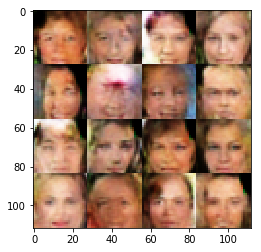

Epoch 1/1... Discriminator Loss: 1.2399... Generator Loss: 0.5329
Epoch 1/1... Discriminator Loss: 1.2574... Generator Loss: 0.4281
Epoch 1/1... Discriminator Loss: 0.5433... Generator Loss: 1.6595
Epoch 1/1... Discriminator Loss: 1.7330... Generator Loss: 2.7107
Epoch 1/1... Discriminator Loss: 0.9668... Generator Loss: 1.0690
Epoch 1/1... Discriminator Loss: 1.3468... Generator Loss: 0.3932
Epoch 1/1... Discriminator Loss: 1.2050... Generator Loss: 2.1032
Epoch 1/1... Discriminator Loss: 0.6713... Generator Loss: 1.2059
Epoch 1/1... Discriminator Loss: 1.1818... Generator Loss: 2.4415
Epoch 1/1... Discriminator Loss: 0.3257... Generator Loss: 1.7663


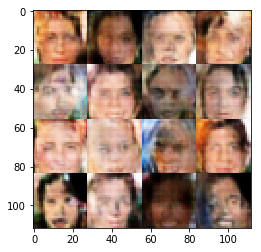

Epoch 1/1... Discriminator Loss: 0.6787... Generator Loss: 0.8987
Epoch 1/1... Discriminator Loss: 0.1835... Generator Loss: 2.4690
Epoch 1/1... Discriminator Loss: 0.1504... Generator Loss: 3.3314
Epoch 1/1... Discriminator Loss: 0.3774... Generator Loss: 1.7531
Epoch 1/1... Discriminator Loss: 0.2848... Generator Loss: 1.8013
Epoch 1/1... Discriminator Loss: 0.2558... Generator Loss: 2.8974
Epoch 1/1... Discriminator Loss: 2.2123... Generator Loss: 2.1265
Epoch 1/1... Discriminator Loss: 1.6513... Generator Loss: 0.3174
Epoch 1/1... Discriminator Loss: 1.3070... Generator Loss: 1.2430
Epoch 1/1... Discriminator Loss: 0.6724... Generator Loss: 1.0094


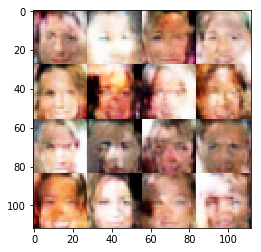

Epoch 1/1... Discriminator Loss: 0.2646... Generator Loss: 2.0508
Epoch 1/1... Discriminator Loss: 0.4111... Generator Loss: 1.5292
Epoch 1/1... Discriminator Loss: 1.2108... Generator Loss: 0.5737
Epoch 1/1... Discriminator Loss: 0.8273... Generator Loss: 0.7360
Epoch 1/1... Discriminator Loss: 0.9511... Generator Loss: 2.6689
Epoch 1/1... Discriminator Loss: 0.4137... Generator Loss: 1.4211
Epoch 1/1... Discriminator Loss: 0.9991... Generator Loss: 2.3685
Epoch 1/1... Discriminator Loss: 1.2295... Generator Loss: 0.4483
Epoch 1/1... Discriminator Loss: 0.6495... Generator Loss: 2.4324
Epoch 1/1... Discriminator Loss: 0.1490... Generator Loss: 3.2509


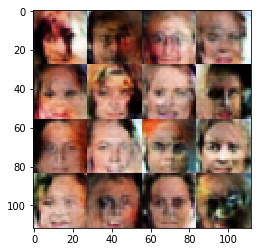

Epoch 1/1... Discriminator Loss: 0.6881... Generator Loss: 0.8573
Epoch 1/1... Discriminator Loss: 0.3992... Generator Loss: 1.3776
Epoch 1/1... Discriminator Loss: 0.1973... Generator Loss: 2.2696
Epoch 1/1... Discriminator Loss: 0.9598... Generator Loss: 2.7991
Epoch 1/1... Discriminator Loss: 1.9958... Generator Loss: 0.1918
Epoch 1/1... Discriminator Loss: 0.5462... Generator Loss: 2.2073
Epoch 1/1... Discriminator Loss: 0.2614... Generator Loss: 2.5815
Epoch 1/1... Discriminator Loss: 1.6618... Generator Loss: 0.3018
Epoch 1/1... Discriminator Loss: 0.4943... Generator Loss: 1.5570
Epoch 1/1... Discriminator Loss: 1.0406... Generator Loss: 0.6194


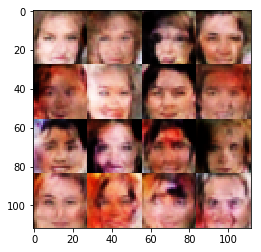

Epoch 1/1... Discriminator Loss: 0.4263... Generator Loss: 2.1436
Epoch 1/1... Discriminator Loss: 0.4589... Generator Loss: 2.6072
Epoch 1/1... Discriminator Loss: 0.4572... Generator Loss: 1.3600
Epoch 1/1... Discriminator Loss: 1.7564... Generator Loss: 0.2275
Epoch 1/1... Discriminator Loss: 0.3280... Generator Loss: 1.6180
Epoch 1/1... Discriminator Loss: 0.0626... Generator Loss: 3.2511
Epoch 1/1... Discriminator Loss: 0.0610... Generator Loss: 3.2990
Epoch 1/1... Discriminator Loss: 0.0620... Generator Loss: 3.3663
Epoch 1/1... Discriminator Loss: 0.0670... Generator Loss: 3.5009
Epoch 1/1... Discriminator Loss: 0.0775... Generator Loss: 3.4340


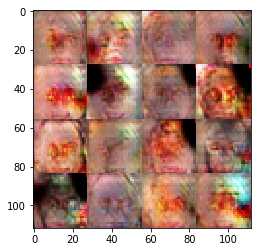

Epoch 1/1... Discriminator Loss: 0.0998... Generator Loss: 2.8894
Epoch 1/1... Discriminator Loss: 0.1217... Generator Loss: 2.8230
Epoch 1/1... Discriminator Loss: 0.0671... Generator Loss: 3.5723
Epoch 1/1... Discriminator Loss: 0.4668... Generator Loss: 4.9601
Epoch 1/1... Discriminator Loss: 0.0842... Generator Loss: 3.1220
Epoch 1/1... Discriminator Loss: 0.0600... Generator Loss: 5.4268
Epoch 1/1... Discriminator Loss: 0.0245... Generator Loss: 6.1947
Epoch 1/1... Discriminator Loss: 0.7279... Generator Loss: 4.7932
Epoch 1/1... Discriminator Loss: 1.1766... Generator Loss: 1.1698
Epoch 1/1... Discriminator Loss: 1.2301... Generator Loss: 0.6227


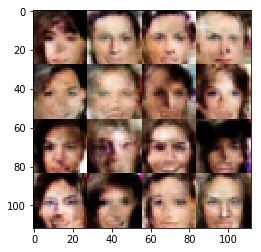

Epoch 1/1... Discriminator Loss: 0.2884... Generator Loss: 2.3019
Epoch 1/1... Discriminator Loss: 0.2029... Generator Loss: 2.6904
Epoch 1/1... Discriminator Loss: 0.1356... Generator Loss: 3.1308
Epoch 1/1... Discriminator Loss: 0.1770... Generator Loss: 2.5075
Epoch 1/1... Discriminator Loss: 1.7283... Generator Loss: 0.2964
Epoch 1/1... Discriminator Loss: 2.2356... Generator Loss: 0.1609
Epoch 1/1... Discriminator Loss: 2.9894... Generator Loss: 0.0630
Epoch 1/1... Discriminator Loss: 1.4183... Generator Loss: 0.3822
Epoch 1/1... Discriminator Loss: 0.5678... Generator Loss: 3.0586
Epoch 1/1... Discriminator Loss: 1.1841... Generator Loss: 0.4925


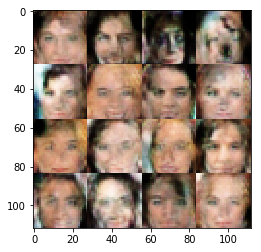

Epoch 1/1... Discriminator Loss: 0.6001... Generator Loss: 1.4555
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 0.4063
Epoch 1/1... Discriminator Loss: 0.8852... Generator Loss: 3.4203
Epoch 1/1... Discriminator Loss: 0.7573... Generator Loss: 0.8189
Epoch 1/1... Discriminator Loss: 1.3251... Generator Loss: 3.1841
Epoch 1/1... Discriminator Loss: 0.8820... Generator Loss: 0.6551
Epoch 1/1... Discriminator Loss: 1.4739... Generator Loss: 1.5563
Epoch 1/1... Discriminator Loss: 0.6932... Generator Loss: 0.8535
Epoch 1/1... Discriminator Loss: 0.4963... Generator Loss: 2.3933
Epoch 1/1... Discriminator Loss: 1.6612... Generator Loss: 3.9146


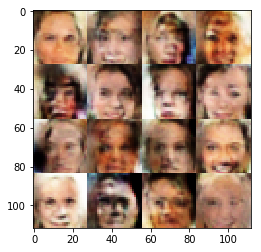

Epoch 1/1... Discriminator Loss: 0.5710... Generator Loss: 1.3797
Epoch 1/1... Discriminator Loss: 0.6211... Generator Loss: 1.3269
Epoch 1/1... Discriminator Loss: 0.4800... Generator Loss: 1.9461
Epoch 1/1... Discriminator Loss: 0.3437... Generator Loss: 1.7120
Epoch 1/1... Discriminator Loss: 0.2195... Generator Loss: 3.7234
Epoch 1/1... Discriminator Loss: 0.2395... Generator Loss: 3.7545
Epoch 1/1... Discriminator Loss: 1.4902... Generator Loss: 0.3821
Epoch 1/1... Discriminator Loss: 0.1908... Generator Loss: 2.6824
Epoch 1/1... Discriminator Loss: 0.3474... Generator Loss: 3.1507
Epoch 1/1... Discriminator Loss: 0.5071... Generator Loss: 1.3121


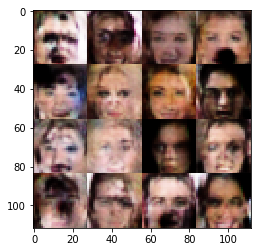

Epoch 1/1... Discriminator Loss: 0.6445... Generator Loss: 3.9982
Epoch 1/1... Discriminator Loss: 0.4164... Generator Loss: 1.4126
Epoch 1/1... Discriminator Loss: 0.1885... Generator Loss: 2.6149
Epoch 1/1... Discriminator Loss: 0.4482... Generator Loss: 1.4176
Epoch 1/1... Discriminator Loss: 0.5820... Generator Loss: 1.1719
Epoch 1/1... Discriminator Loss: 0.3144... Generator Loss: 1.7759
Epoch 1/1... Discriminator Loss: 0.1513... Generator Loss: 2.5962
Epoch 1/1... Discriminator Loss: 0.1750... Generator Loss: 2.9567
Epoch 1/1... Discriminator Loss: 0.0672... Generator Loss: 5.4198
Epoch 1/1... Discriminator Loss: 0.1738... Generator Loss: 6.6802


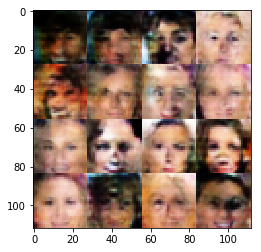

Epoch 1/1... Discriminator Loss: 0.1144... Generator Loss: 2.9772
Epoch 1/1... Discriminator Loss: 0.1534... Generator Loss: 2.5653
Epoch 1/1... Discriminator Loss: 0.1633... Generator Loss: 2.3022
Epoch 1/1... Discriminator Loss: 1.6235... Generator Loss: 1.2443
Epoch 1/1... Discriminator Loss: 0.8550... Generator Loss: 1.9470
Epoch 1/1... Discriminator Loss: 1.0002... Generator Loss: 1.5062
Epoch 1/1... Discriminator Loss: 2.0256... Generator Loss: 2.7367
Epoch 1/1... Discriminator Loss: 1.2808... Generator Loss: 0.5009
Epoch 1/1... Discriminator Loss: 0.2275... Generator Loss: 2.3101
Epoch 1/1... Discriminator Loss: 2.3229... Generator Loss: 0.3087


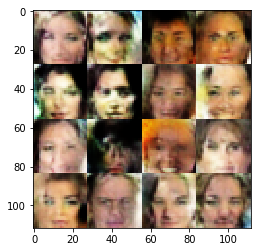

Epoch 1/1... Discriminator Loss: 0.4225... Generator Loss: 1.6722
Epoch 1/1... Discriminator Loss: 0.7610... Generator Loss: 1.5726
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 3.6938
Epoch 1/1... Discriminator Loss: 0.7439... Generator Loss: 2.6778
Epoch 1/1... Discriminator Loss: 0.7686... Generator Loss: 0.9769
Epoch 1/1... Discriminator Loss: 0.2316... Generator Loss: 2.3232
Epoch 1/1... Discriminator Loss: 0.7484... Generator Loss: 0.8180
Epoch 1/1... Discriminator Loss: 0.3936... Generator Loss: 1.5766
Epoch 1/1... Discriminator Loss: 0.8100... Generator Loss: 0.8282
Epoch 1/1... Discriminator Loss: 0.2876... Generator Loss: 2.0523


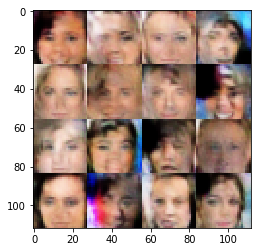

Epoch 1/1... Discriminator Loss: 1.2969... Generator Loss: 0.4451
Epoch 1/1... Discriminator Loss: 0.3763... Generator Loss: 2.0679
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.3878
Epoch 1/1... Discriminator Loss: 0.4111... Generator Loss: 1.4317
Epoch 1/1... Discriminator Loss: 1.1514... Generator Loss: 0.5090
Epoch 1/1... Discriminator Loss: 0.0825... Generator Loss: 4.0199
Epoch 1/1... Discriminator Loss: 0.1573... Generator Loss: 3.0547
Epoch 1/1... Discriminator Loss: 0.0554... Generator Loss: 4.8673
Epoch 1/1... Discriminator Loss: 0.1108... Generator Loss: 3.3499
Epoch 1/1... Discriminator Loss: 0.3193... Generator Loss: 1.6706


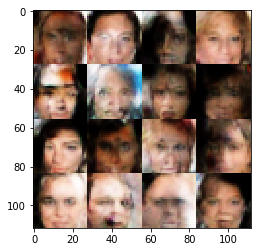

Epoch 1/1... Discriminator Loss: 0.3139... Generator Loss: 2.1138
Epoch 1/1... Discriminator Loss: 1.5347... Generator Loss: 0.7162
Epoch 1/1... Discriminator Loss: 1.5716... Generator Loss: 0.3232
Epoch 1/1... Discriminator Loss: 1.6976... Generator Loss: 0.5572
Epoch 1/1... Discriminator Loss: 1.0993... Generator Loss: 0.6788
Epoch 1/1... Discriminator Loss: 0.7384... Generator Loss: 1.3937
Epoch 1/1... Discriminator Loss: 1.3203... Generator Loss: 0.6987
Epoch 1/1... Discriminator Loss: 0.8698... Generator Loss: 0.8120
Epoch 1/1... Discriminator Loss: 0.9615... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.8931... Generator Loss: 0.2070


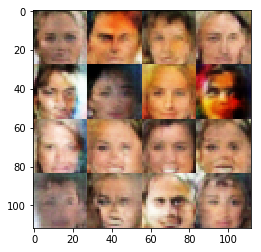

Epoch 1/1... Discriminator Loss: 1.1992... Generator Loss: 0.5018
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 0.4977
Epoch 1/1... Discriminator Loss: 0.7953... Generator Loss: 0.9075
Epoch 1/1... Discriminator Loss: 0.5933... Generator Loss: 1.1147
Epoch 1/1... Discriminator Loss: 0.2470... Generator Loss: 2.2091
Epoch 1/1... Discriminator Loss: 0.4771... Generator Loss: 1.3971
Epoch 1/1... Discriminator Loss: 0.5156... Generator Loss: 1.5639
Epoch 1/1... Discriminator Loss: 0.2779... Generator Loss: 3.0712
Epoch 1/1... Discriminator Loss: 0.1286... Generator Loss: 3.6115
Epoch 1/1... Discriminator Loss: 0.2311... Generator Loss: 1.9692


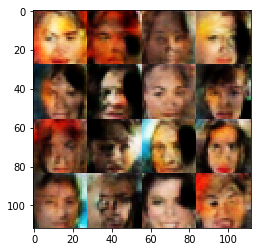

Epoch 1/1... Discriminator Loss: 0.3091... Generator Loss: 1.7851
Epoch 1/1... Discriminator Loss: 0.1468... Generator Loss: 3.3080
Epoch 1/1... Discriminator Loss: 0.2185... Generator Loss: 2.3271
Epoch 1/1... Discriminator Loss: 0.0536... Generator Loss: 5.1941
Epoch 1/1... Discriminator Loss: 2.3238... Generator Loss: 0.1695
Epoch 1/1... Discriminator Loss: 0.6650... Generator Loss: 1.4964
Epoch 1/1... Discriminator Loss: 0.2261... Generator Loss: 2.3054
Epoch 1/1... Discriminator Loss: 0.4432... Generator Loss: 1.3061
Epoch 1/1... Discriminator Loss: 0.5070... Generator Loss: 2.0414
Epoch 1/1... Discriminator Loss: 0.4191... Generator Loss: 2.9738


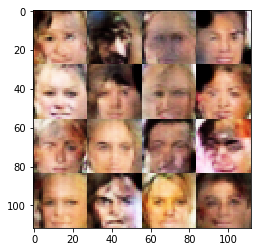

Epoch 1/1... Discriminator Loss: 0.9202... Generator Loss: 3.3520
Epoch 1/1... Discriminator Loss: 0.3884... Generator Loss: 1.5098
Epoch 1/1... Discriminator Loss: 0.1071... Generator Loss: 4.3262
Epoch 1/1... Discriminator Loss: 0.2126... Generator Loss: 2.4538
Epoch 1/1... Discriminator Loss: 0.1048... Generator Loss: 3.3057
Epoch 1/1... Discriminator Loss: 0.2384... Generator Loss: 1.9480
Epoch 1/1... Discriminator Loss: 0.1102... Generator Loss: 3.2925
Epoch 1/1... Discriminator Loss: 0.1982... Generator Loss: 2.1143
Epoch 1/1... Discriminator Loss: 0.3617... Generator Loss: 1.5976
Epoch 1/1... Discriminator Loss: 0.1800... Generator Loss: 4.5508


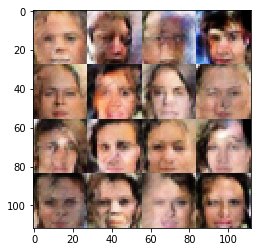

Epoch 1/1... Discriminator Loss: 0.1521... Generator Loss: 3.5424
Epoch 1/1... Discriminator Loss: 0.3988... Generator Loss: 1.4756
Epoch 1/1... Discriminator Loss: 0.1860... Generator Loss: 2.0850
Epoch 1/1... Discriminator Loss: 0.1359... Generator Loss: 3.0256
Epoch 1/1... Discriminator Loss: 0.1321... Generator Loss: 3.9313
Epoch 1/1... Discriminator Loss: 0.2255... Generator Loss: 1.9000


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.